In [992]:
import numpy as np
import pandas as pd

In [993]:
df=pd.read_csv('TN_daily.csv')

In [994]:
df0 = pd.read_json("https://api.covid19india.org/v3/timeseries.json")

In [995]:

TN = df0['TN']
TN =TN.to_dict() 
data = pd.DataFrame.from_dict(TN)
data =  data.transpose()
data = data['total']
data = data.drop(data.index[:30])
df2=pd.DataFrame(data)
data['2020-06-17']

{'confirmed': 50193, 'deceased': 576, 'recovered': 27624, 'tested': 773707}

In [996]:
con = []
dec = []
rec = []

for index, value in data.items():
    #print(index)
    con.append(data[index]['confirmed'])
    dec.append(data[index]['deceased'])
    rec.append(data[index]['recovered'])
    #test.append(data[index]['tested'])
n = len(data)
day = list(range(1, n+1))
dict1 = { 'Day' : day,
'date' : data.index.values,
'Total Confirmed' :con,
'Total Deceased' : dec,
'Total Recovered' : rec,
#'test' : test,
}

dict1
DF= pd.DataFrame(dict1) 
DF=DF.head(len(DF)-1)

#data['2020-06-13']['confirmed']

In [997]:
#df = df.drop(['Date','Total Confirmed','Daily Recovered', 'Total Recovered','Daily Deceased','Daily Confirmed'], axis=1)

In [998]:
#df=df.tail(10)
ta=47
df2=df.tail(ta)
df1 =DF.tail(10)

In [1008]:

df1.tail()

,Day,date,Total Confirmed,Total Deceased,Total Recovered
76,77,2020-06-13,42687,397,23409
77,78,2020-06-14,44661,435,24547
78,79,2020-06-15,46504,479,25344
79,80,2020-06-16,48019,528,26782
80,81,2020-06-17,50193,576,27624


In [1000]:
#Y1 = np.array(df1['Total Confirmed'])
X1 = np.array(df1['Day'])
X2 = np.array(df2['Day'])
#Y1 = np.array(df1['Total Confirmed'])
#Y2 = np.array(df1['Total Recovered'])
#Y3 = np.array(df1['Total Deceased'])
Y1 = np.log(df1['Total Confirmed'])
Y1 = np.array(Y1)
Y2 = np.log(df1['Total Recovered'])
Y2 = np.array(Y2)
Y3 = np.log(df1['Total Deceased'])
Y3 = np.array(Y3)
#Y4 = np.array(df2['Daily Confirmed'])

Y4 =np.log(df2['Confirmed'])
Y4 = np.array(Y4)
Y5 =np.log(df2['Recovered'])
Y5 = np.array(Y5)
Y6 =np.log(df2['Deceased'])
Y6 = np.array(Y6)


In [1001]:
from sklearn.linear_model import LinearRegression
X1=X1.reshape(-1, 1)
X2=X2.reshape(-1, 1)
Y1=Y1.reshape(-1, 1)
Y2=Y2.reshape(-1, 1)
Y3=Y3.reshape(-1, 1)
Y4=Y4.reshape(-1, 1)
Y5=Y5.reshape(-1, 1)
Y6=Y6.reshape(-1, 1)

reg1 = LinearRegression().fit(X1, Y1)
reg2 = LinearRegression().fit(X1, Y2)
reg3 = LinearRegression().fit(X1, Y3)
reg4 = LinearRegression().fit(X2, Y4)
reg5 = LinearRegression().fit(X2, Y5)
reg6 = LinearRegression().fit(X2, Y6)

logb1 = reg1.coef_
loga1 = reg1.intercept_
a1 = np.exp(loga1)
b1 = np.exp(logb1)

logb2 = reg2.coef_
loga2 = reg2.intercept_
a2 = np.exp(loga2)
b2 = np.exp(logb2)

logb3 = reg3.coef_
loga3 = reg3.intercept_
a3 = np.exp(loga3)
b3 = np.exp(logb3)

logb4 = reg4.coef_
loga4 = reg4.intercept_
a4 = np.exp(loga4)
b4 = np.exp(logb4)

logb5 = reg5.coef_
loga5 = reg5.intercept_
a5 = np.exp(loga5)
b5 = np.exp(logb5)

logb6 = reg6.coef_
loga6 = reg6.intercept_
a6 = np.exp(loga6)
b6 = np.exp(logb6)

#print("Based on Last 20 Days Data")
#print ("Total Confirmed Accuracy", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Confirmed", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Recovered ", reg2.score(X1, Y2)*100)
print ("coefficient of determination for Total Deceased ", reg3.score(X1, Y3)*100)
print("coefficient of determination for Based on Last 30 Days Data")
print ("coefficient of determination for Daily Confirmed ", reg4.score(X2, Y4)*100)
print ("coefficient of determination for Daily Recovered ", reg5.score(X2, Y5)*100)
print ("coefficient of determination for Daily Deceased ", reg6.score(X2, Y6)*100)


coefficient of determination for Total Confirmed 99.60338452016909
coefficient of determination for Total Recovered  99.19672189062464
coefficient of determination for Total Deceased  98.86061069319393
coefficient of determination for Based on Last 30 Days Data
coefficient of determination for Daily Confirmed  85.78229183692366
coefficient of determination for Daily Recovered  67.95414107114036
coefficient of determination for Daily Deceased  88.60734274286385


In [1002]:
drange = 15
start =len(df) +1
dval = np.arange(start,start+drange,1)
dval= np.array(dval)
val= dval
dval=dval.reshape(-1, 1)
#print(dval.shape)

start1 =len(DF) +1
dval1 = np.arange(start1,start1+drange,1)
dval1= np.array(dval1)
val1= dval1
dval1=dval1.reshape(-1, 1)
#print(dval1)
import datetime
base = datetime.date.today()
date_list = [base + datetime.timedelta(days=x) for x in range(drange)]

DConfirmed = np.round_(np.multiply(a4,(np.power(b4,val))))
TConfirmed = np.round_(np.multiply(a1,(np.power(b1,val1))))
#TConfirmed = np.round_(reg1.predict(dval1))
DRecovered = np.round_(np.multiply(a5,(np.power(b5,val))))
TRecovered = np.round_(np.multiply(a2,(np.power(b2,val1))))
#TRecovered = np.round_(reg2.predict(dval1))
DDeceased = np.round_(np.multiply(a6,(np.power(b6,val))))
TDeceased = np.round_(np.multiply(a3,(np.power(b3,val1))))
#TDeceased = np.round_(reg3.predict(dval1))

dict = {
        'Date' : date_list,
        'Daily Confirmed': DConfirmed.flatten(), 
        'Total Confirmed': TConfirmed.flatten(), 
   #     'Daily Recovered': DRecovered.flatten() ,
    #    'Total Recovered': TRecovered.flatten(),
    #    'Daily Deceased' : DDeceased.flatten(),
     #   'Total Deceased' : TDeceased.flatten(),
        'Day' : dval1.flatten() ,
       } 
final = pd.DataFrame(dict) 
start1

82

In [1003]:
df1.tail()

,Day,date,Total Confirmed,Total Deceased,Total Recovered
76,77,2020-06-13,42687,397,23409
77,78,2020-06-14,44661,435,24547
78,79,2020-06-15,46504,479,25344
79,80,2020-06-16,48019,528,26782
80,81,2020-06-17,50193,576,27624


In [1004]:
date=pd.to_datetime(df['Date'])
df['date'] = date

In [1005]:
final

,Date,Daily Confirmed,Total Confirmed,Day
0,2020-06-18,2158.0,53161.0,82
1,2020-06-19,2236.0,55662.0,83
2,2020-06-20,2316.0,58280.0,84
3,2020-06-21,2400.0,61021.0,85
4,2020-06-22,2486.0,63892.0,86
5,2020-06-23,2575.0,66897.0,87
6,2020-06-24,2668.0,70043.0,88
7,2020-06-25,2764.0,73338.0,89
8,2020-06-26,2863.0,76787.0,90
9,2020-06-27,2966.0,80399.0,91


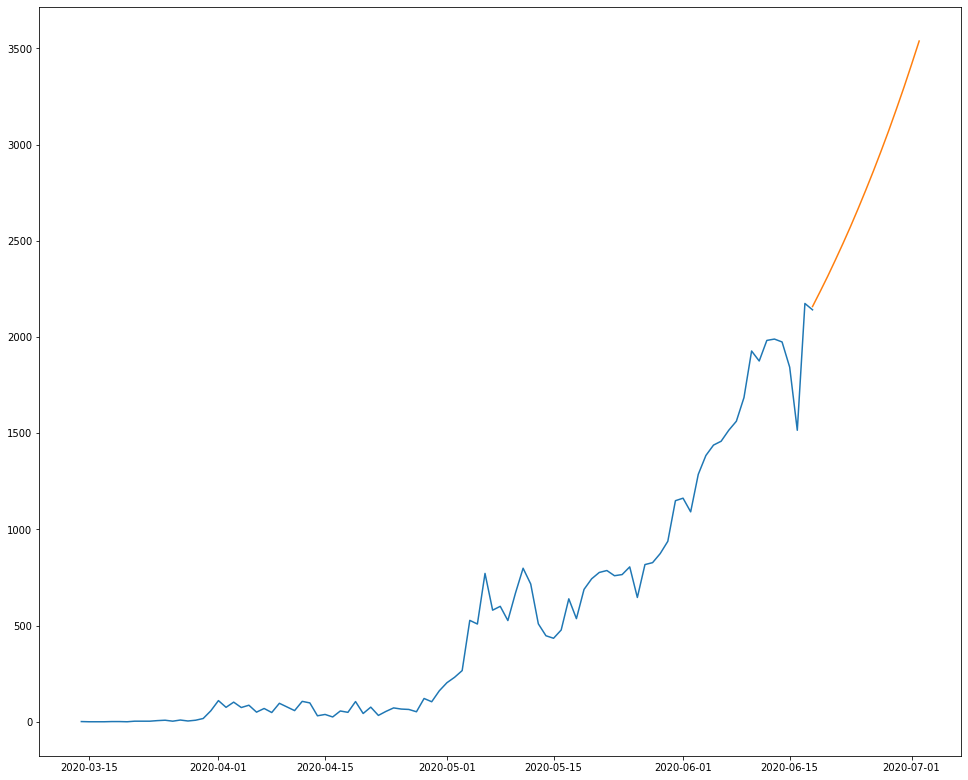

In [1006]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(16,13))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = df['date']
position =df['Confirmed']

time1 = final['Date']
position1 = final['Daily Confirmed']

axes.plot(time, position)
axes.plot(time1, position1)

plt.show()





#plt.xlabel('Date(day)')
#plt.ylabel('Total Confirmed')

Text(0, 0.5, 'Total Confirmed')

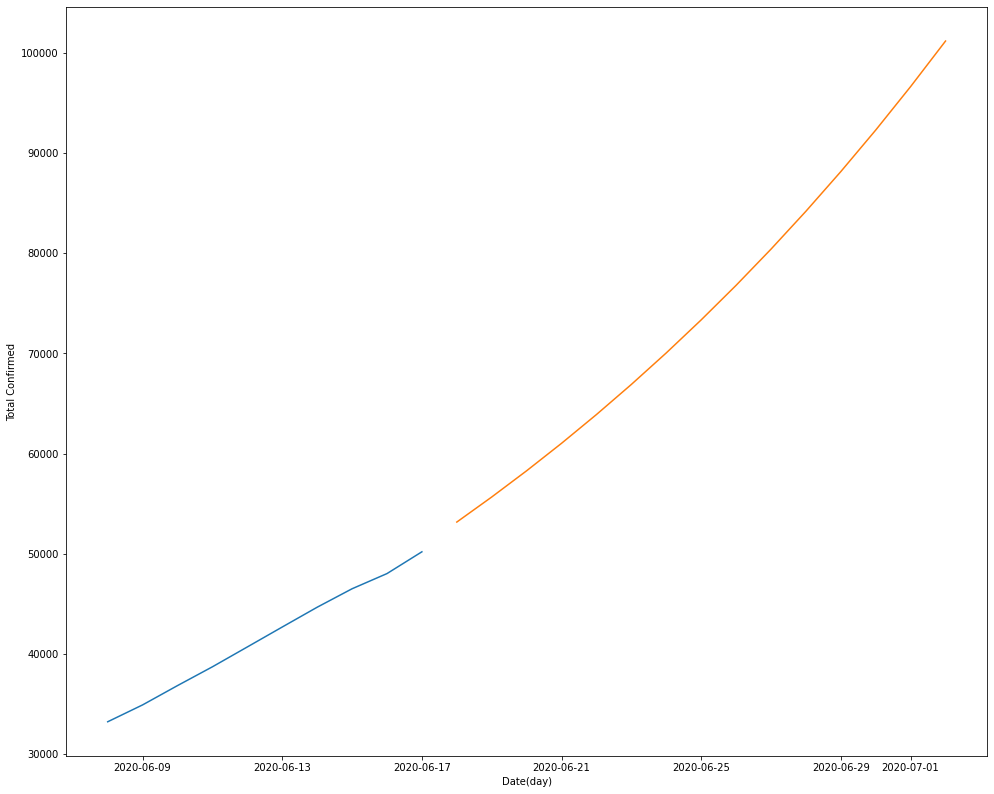

In [1009]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(16,13))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = df1['date']
position =df1['Total Confirmed']

time1 = final['Date']
position1 = final['Total Confirmed']
axes.plot(time, position)
axes.plot(time1, position1)

plt.xlabel('Date(day)')
plt.ylabel('Total Confirmed')

In [967]:
#save to Csv
final.to_csv("predictTN.csv")
pr=pd.read_csv('predictTN.csv')
pr.head()

,Unnamed: 0,Date,Daily Confirmed,Total Confirmed,Day
0,0,2020-06-18,2127.0,52192.0,82
1,1,2020-06-19,2206.0,54303.0,83
2,2,2020-06-20,2289.0,56499.0,84
3,3,2020-06-21,2374.0,58784.0,85
4,4,2020-06-22,2463.0,61162.0,86
